# DAY 25 

相信大家在借助ai写代码的时候，经常会遇到try-except的异常处理模块，这是因为大部分大模型在后训练阶段都是经过强化学习训练的，为了确保结果的正确运行，只有采取 try-except的异常处理模块才能提高模型运行成功的概率。

但是我们日常写代码的时候，大概率不会采取这些写法。所以我们要适应ai的写法。

这也是今天专题的由来

## 异常处理机制

Python的异常处理机制为程序提供了强大的容错能力 (fault tolerance)。当程序在运行时遇到意外情况（即异常），它不会直接崩溃，而是可以被设计成优雅地处理这些错误，并可能继续执行后续逻辑（如果设计允许）或以可控的方式结束。

当异常发生时，Python会创建一个异常对象 (exception object)（通常是 Exception 类的子类实例）。如果这段可能出错的代码位于 try 语句块中，程序流程会寻找并跳转到匹配的 except 语句块（如果存在）来处理这个异常。

核心概念：

- try: 包含可能会引发异常的代码块。程序会首先尝试执行这里的代码。
- except: 如果try块中的代码确实引发了特定类型的异常（或者任何异常，如果未指定类型），则执行此代码块。
- else: （可选）如果try块中的代码没有发生任何异常，则执行此代码块。
- finally: （可选）无论try块中是否发生异常，总会执行此代码块（常用于资源清理）。

常见语句结构如下：

1. try-except

这是最基本的错误处理结构。

```python
try:
    # 可能会引发异常的代码
except ExceptionType: # 最好指定具体的异常类型，例如 ZeroDivisionError, FileNotFoundError
    # 当 try 块中发生 ExceptionType 类型的异常时执行的代码
except: # 不推荐：捕获所有类型的异常，可能会隐藏bug
    # 当 try 块中发生任何其他未被前面 except 捕获的异常时执行的代码
```

逻辑说明： 程序首先尝试执行 try 块中的代码。

如果 try 块中的代码没有发生异常，则 except 块会被跳过，程序继续执行 try-except 结构之后的代码。

如果 try 块中的代码发生了异常，Python会查找与该异常类型匹配的 except 块。如果找到匹配的，则执行该 except 块中的代码，然后继续执行整个 try-except 结构之后的代码（除非 except 块中又引发了新异常或执行了 return/break/continue 等）。如果未找到匹配的 except 块，异常会向上传播。

类比： 你可以把它看作是：“尝试做这件事，如果出错了（并且是特定类型的错误），就执行补救措施。”

1. try-except-else

在 try-except 的基础上增加了 else 子句。

```python
try:
    # 可能会引发异常的代码
except ExceptionType:
    # 当 try 块中发生 ExceptionType 类型的异常时执行的代码
else:
    # 当 try 块中【没有】发生任何异常时执行的代码
```

逻辑说明：
首先，执行 try 块中的代码。

如果 try 块中发生异常，则会查找并执行匹配的 except 块，else 块不会被执行。

如果 try 块中没有发生任何异常，则会跳过所有 except 块，然后执行 else 块中的代码。

**与 if-else-elif 的区别（重要！）：**

if-elif-else 结构中，只有一个代码块会被执行（if 条件满足则执行 if 块；否则检查 elif，满足则执行 elif 块；否则执行 else 块）。

而在 try-except-else 结构中：

如果 try 成功：try 块的代码会执行，然后 else 块的代码也会执行。

如果 try 失败：try 块中出错前的代码会执行，然后匹配的 except 块的代码会执行（else 块不会执行）。

更准确的理解： else 子句中的代码是你希望在 try 块中的代码成功完成且没有引发任何异常之后才执行的代码。这通常用于分离“主要尝试的操作”和“操作成功后的后续步骤”，使得 try 块更聚焦于可能出错的部分。

一个简单的例子阐述 else 的作用：

```python
try:
    # 假设 result_operation() 是一个可能出错的操作
    value = result_operation()
except SomeError:
    print("操作失败，使用默认值。")
    value = default_value
else:
    # 只有当 result_operation() 成功时，才执行这里的代码
    print(f"操作成功，结果是: {value}。现在进行后续处理...")
    process_value_further(value)


如果把 process_value_further(value) 放在 try 块内，那么如果 process_value_further 本身也可能抛出 SomeError（或其他 try 块想要捕获的错误），它就会被意外捕获。else 块确保了只有在 try 块中的代码完全无误地执行完毕后，才会执行 else 块的内容。


下面我们来介绍下有哪些异常报错，如果你留心报错信息，常见以下几种：

值得一提的是，过去

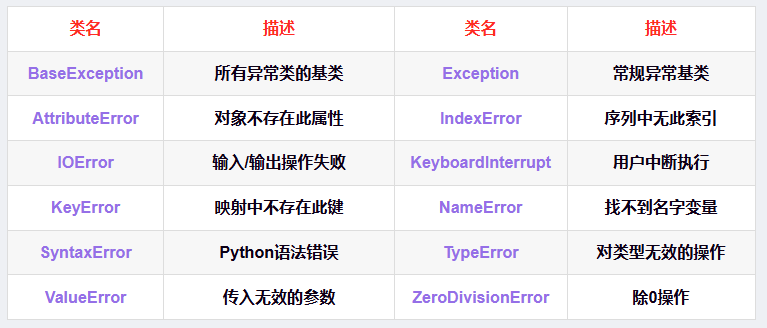

## debug

过去ai没有兴起的时候，debug主要靠搜索解决方案+理解报错信息，现在很多人直接借助ai就可以无脑解决，实际上这又回到我们最初的观点：此时你的能力并没有提升。

### SyntaxError (语法错误)

原因： 代码不符合 Python 的语法规则，解释器在尝试解析代码时就会失败。这种错误在程序 运行之前 就会被检测到。

In [8]:
print("--- 1. SyntaxError ，可取消下列注释运行查看---")
# 示例 a: 缺少冒号
# def my_function()
#     print("Hello")


# 示例 b: 非法表达式
# x = 5 +
# print(x)

# 为了让脚本能继续运行其他示例，我会注释掉这些会直接导致脚本无法解析的错误
# 请在演示时逐个取消注释并运行，观察错误

--- 1. SyntaxError ，可取消下列注释运行查看---


### NameError (名称错误)

原因： 尝试使用一个未被定义的变量、函数或对象的名称。

In [ ]:
# 示例 a: 变量未定义
# print(some_undefined_variable)

# 示例 b: 打错变量名
# print(my_lisst) # 变量名拼写错误

### TypeError (类型错误)

原因： 对一个不支持该操作的数据类型执行了某个操作或函数。


In [13]:
# print("Age: " + 25) # 字符串和整数
# my_number = 10
# my_number() # 尝试像函数一样调用一个整数

### ValueError (值错误)

原因： 函数接收到的参数类型正确，但其值不合适或无效。

In [16]:
# my_string = "12.34.56"
# number = float(my_string) # '12.34.56' 不是一个有效的浮点数表示

### IndexError (索引错误)

原因： 尝试访问序列（如列表、元组、字符串）中一个不存在的索引。

In [18]:
# data = ("apple", "banana")
# print(data[2])

### KeyError (键错误)

原因： 尝试访问字典中一个不存在的键。

In [ ]:
# student_grades = {"math": 90, "science": 85}
# print(student_grades["history"])

### AttributeError (属性错误)

原因： 尝试访问一个对象没有的属性或方法。

In [22]:
# 示例a
# a_string = "hello"
# print(a_string.length) # 字符串长度用 len(a_string)，不是 .length 属性

# 示例b
# import numpy as np
# arr = np.array([1,2,3])
# print(arr.non_existent_attribute)

今天过后，每次执行代码 可以简单看看代码报错信息，而不是总是无脑交给ai来解决，给自己成长的空间

### ZeroDivisionError (除零错误)

原因： 尝试将一个数字除以零。

In [24]:
# result = 10 / 0
# result

### FileNotFoundError (文件未找到错误)

原因： 尝试打开一个不存在的文件（通常是在读模式下），或者路径不正确。

In [27]:
# import pandas as pd
# data = pd.read_csv("hh.csv")

###  ModuleNotFoundError (导入错误)

尝试导入一个不存在的模块，或者模块存在但其中的特定名称找不到， Python 的模块加载器找不到这个模块。去安装库即可，如果是自定义的模块，配置好对应的路径

In [29]:
# import hhh

已经看到，当你的代码出现这类错误时，程序会立即停止执行，并打印出一个 “traceback”（回溯信息），这个信息非常重要，它会告诉你：
1. 错误类型 (e.g., NameError, TypeError)
2. 错误发生的文件名和行号
3. 导致错误的那行代码
4. 错误的简要描述

接下来来用固定的语句捕获这类错误

##  try-except

try：把你认为可能会出错的代码放在这里。

except：如果 try 块里的代码真的出错了（从出错开始就不会继续执行try之后的代码了），Python 就会跳到 except 块里执行这里的代码，而不是崩溃。

In [ ]:
# print("--- 之前会崩溃的代码 (ZeroDivisionError) ---")
numerator = 10
denominator = 0
result = numerator / denominator # 这行会引发 ZeroDivisionError
print(f"结果是: {result}")
print("这行代码不会执行，因为程序已崩溃")

ZeroDivisionError: division by zero

In [35]:
print("--- 使用 try-except 捕获 ZeroDivisionError ---")
numerator = 10
denominator = 0

try:
    print("尝试进行除法运算...")
    result = numerator / denominator # 潜在的风险代码
    print(f"计算结果是: {result}") # 如果上面出错，这行不会执行
except ZeroDivisionError:
    print("发生了一个除以零的错误！")
    result = "未定义 (除以零)" # 可以给一个默认值或提示

print(f"程序继续执行... 最终结果的记录为: {result}")


--- 使用 try-except 捕获 ZeroDivisionError ---
尝试进行除法运算...
发生了一个除以零的错误！
程序继续执行... 最终结果的记录为: 未定义 (除以零)


In [36]:
# print("--- 之前会崩溃的代码 (TypeError) ---")
x = "hello"
y = 5
result = x + y # 字符串不能和整数直接相加
print(result)

TypeError: can only concatenate str (not "int") to str

In [37]:
print("--- 使用 try-except 捕获 TypeError ---")
x = "Total items: "
y = 5 # 假设这是一个从某处获取的数字

try:
    print("尝试连接字符串和数字...")
    message = x + y # 潜在的 TypeError
    print(f"最终消息: {message}")
except TypeError:
    print("类型错误！不能直接将字符串和数字相加。")
    print("尝试将数字转换为字符串进行连接...")
    message = x + str(y) # 修正操作
    print(f"修正后的消息: {message}")

print(f"程序继续... 生成的消息是: {message}")


--- 使用 try-except 捕获 TypeError ---
尝试连接字符串和数字...
类型错误！不能直接将字符串和数字相加。
尝试将数字转换为字符串进行连接...
修正后的消息: Total items: 5
程序继续... 生成的消息是: Total items: 5


接下来，我们可以讨论如何捕获多种类型的错误，以及 else 和 finally 子句的用法。

## try - except- else -fiinally
- try: 包含可能引发异常的代码。
- except: 处理在 try 块中发生的特定异常。
- else: （可选）如果 try 块中没有发生任何异常，则执行此代码块。
- finally: （可选）无论 try 块中是否发生异常，总会执行此代码块。

为什么使用 else？
1. 清晰性： 它清楚地将“主要尝试的操作（可能出错）”与“操作成功后的后续步骤”分开。
2. 避免意外捕获： 如果把“成功后的后续步骤”也放在 try 块里，而这些步骤本身也可能引发 try 块想要捕获的同类型异常，那么就会导致逻辑混淆。else 块中的代码不会被同一个 try 块的 except 子句捕获。

In [40]:
print("--- try-except-else 示例 ---")

def safe_divide(a, b):
    print(f"\n尝试计算 {a} / {b}")
    try:
        result = a / b
    except ZeroDivisionError:
        print("错误：除数不能为零！")
        return None # 或者其他表示失败的值
    except TypeError:
        print("错误：输入必须是数字！")
        return None
    else:
        # 只有当 try 块中的 a / b 成功执行时，这里才会执行
        print("除法运算成功！")
        print(f"结果是: {result}")
        # 可以在这里进行基于成功结果的进一步操作
        print(f"结果的两倍是: {result * 2}")
        return result

# 测试用例
safe_divide(10, 2)  # 成功
safe_divide(10, 0)  # ZeroDivisionError
safe_divide("10", 2) # TypeError (如果我们不先做类型转换的话)
safe_divide(20, "abc") # TypeError

--- try-except-else 示例 ---

尝试计算 10 / 2
除法运算成功！
结果是: 5.0
结果的两倍是: 10.0

尝试计算 10 / 0
错误：除数不能为零！

尝试计算 10 / 2
错误：输入必须是数字！

尝试计算 20 / abc
错误：输入必须是数字！


上述写法可以使函数更加健壮，实现同样的逻辑可以最开始使用if else 判断输入格式

finally 子句
finally 子句中的代码无论 try 块中是否发生异常，也无论 except 块是否被执行，甚至无论 try 或 except 块中是否有 return 语句，它总会被执行。

finally这个无论如何都会执行的特性，在机器学习和深度学习的中，多涉及资源的保存、文件的关闭等。



1. 无论训练成功、失败还是中途被打断，都确保日志文件被正确关闭，避免数据丢失或文件损坏。
2. 确保计算资源在使用完毕后被释放，供其他进程或任务使用。更常见的是使用 with 语句来自动管理这类资源，with 语句本身就隐式地使用了类似 finally 的机制。（with open语句）
3. 关闭数据库连接
4. 恢复全局状态或配置， 如果程序在运行过程中修改了全局变量或配置文件，在异常处理结束后，需要恢复到之前的状态或配置。
5. 模型训练可能非常耗时，如果中途因为各种原因（OOM、手动中断、硬件故障）停止，我们希望记录下中断的状态，方便后续恢复。

在ML/DL项目中，由于流程长、资源消耗大、外部依赖多，finally 提供的这种“保证执行”的机制对于构建稳定、可靠的系统至关重要